<a href="https://colab.research.google.com/github/gojalifs/kmeans_clustering/blob/master/Elbow_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Upload file
from google.colab import files
import pandas as pd
!pip install kneed

In [ ]:

# Step 2: Baca CSV
df = pd.read_excel('dataset.xlsx')

# Tampilkan data awal
print("\nData sample:")
df.head()



Data sample:


,name,album,artist,release_date,length,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature
0,Klaxon,I SWAY,(G)I-DLE,2024-07-08,0.294,0.893,0.133,0.880,0.000,0.312,0.744,0.245,0.439,0.814,0.75
1,Arteri,Membangun & Menghancurkan,.Feast,2024-08-30,0.476,0.213,0.009,0.925,0.000,0.048,0.748,0.124,0.849,0.259,0.75
2,Metakritik,Membangun & Menghancurkan,.Feast,2024-08-30,0.402,0.433,0.000,0.917,0.001,0.064,0.674,0.034,0.591,0.643,0.75
3,Nina,Membangun & Menghancurkan,.Feast,2024-08-30,0.491,0.373,0.187,0.603,0.454,0.067,0.641,0.006,0.242,0.337,0.75
4,"o,Tuan",Membangun & Menghancurkan,.Feast,2024-08-30,0.545,0.460,0.057,0.600,0.127,0.051,0.565,0.009,0.512,0.228,0.75


In [ ]:
# Step 3: Pilih kolom
print("\nKolom tersedia:")
print(list(df.columns))

# Input kolom yang ingin digunakan
cols = input("\nMasukkan nama kolom yang ingin digunakan untuk clustering (pisahkan dengan koma):\nContoh: x,y\n").split(',')
cols = [c.strip() for c in cols]

# Ambil data numerik dan buang NaN
data = df[cols].dropna()
data_values = data.values


Kolom tersedia:
['name', 'album', 'artist', 'release_date', 'length', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'time_signature']

Masukkan nama kolom yang ingin digunakan untuk clustering (pisahkan dengan koma):
Contoh: x,y
length,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature


In [ ]:
# Step 4: Hitung WCSS
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator

wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)


In [ ]:
# Step 5: Tampilkan hasil
print("\nNilai WCSS untuk tiap K:")
for i, val in enumerate(wcss, start=1):
    print(f"K={i}: WCSS={val:.2f}")



Nilai WCSS untuk tiap K:
K=1: WCSS=250.99
K=2: WCSS=160.66
K=3: WCSS=137.91
K=4: WCSS=127.62
K=5: WCSS=121.57
K=6: WCSS=115.84
K=7: WCSS=112.04
K=8: WCSS=102.96
K=9: WCSS=97.99
K=10: WCSS=94.57


In [ ]:
# Deteksi elbow otomatis
knee = KneeLocator(K_range, wcss, curve="convex", direction="decreasing")
elbow_k = knee.elbow
print(f"\n🔍 Elbow ditemukan pada K = {elbow_k}")




🔍 Elbow ditemukan pada K = 3


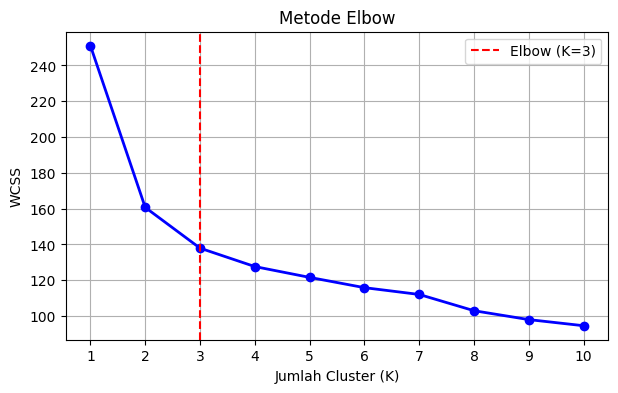

In [ ]:
# Step 6: Plot Elbow Curve
plt.figure(figsize=(7, 4))
plt.plot(K_range, wcss, 'bo-', linewidth=2)
plt.axvline(x=elbow_k, color='r', linestyle='--', label=f'Elbow (K={elbow_k})')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.xticks(K_range)
plt.legend()
plt.show()


In [ ]:
# Step 7: Cluster dengan K optimal
final_kmeans = KMeans(n_clusters=elbow_k, init='k-means++', random_state=42, n_init='auto')
cluster_labels = final_kmeans.fit_predict(data_values)


In [ ]:
# Step 8: Tambahkan label ke dataframe asli
df_filtered = df.loc[data.index].copy()
df_filtered['cluster'] = cluster_labels


In [ ]:
# Step 9: Simpan ke Excel
output_filename = 'clustered_output.xlsx'
df_filtered.to_excel(output_filename, index=False)
print(f"\n✅ Hasil disimpan ke file: {output_filename}")
files.download(output_filename)



✅ Hasil disimpan ke file: clustered_output.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>